In [2]:
import os
import numpy as np
import cv2
import skimage.io

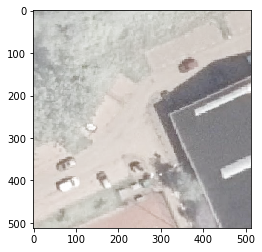

In [53]:
import matplotlib.pyplot as plt

rgb_path = "./173154_rgb.png"
infra_path = "./173154_infra.png"
rgb = skimage.io.imread(rgb_path)
infra = skimage.io.imread(infra_path)

merged = np.copy(rgb)
merged[:,:,3] = (infra[:,:,0]-255) * (-1)

plt.imshow(merged, interpolation='nearest')

In [3]:
path_rgb = "./run4/rgb/19"
path_infra = "./run4/infra/19"
path_labels = "./run4/labels/19"
path_AB = "./run4/non_merged_pairs/19"

in_size = 512
crop_size = 450
crop_count = 3 #squared
out_size = 256

if not os.path.exists(path_AB + "\\A"):
  os.makedirs(path_AB + "\\A")
if not os.path.exists(path_AB + "\\B"):  
  os.makedirs(path_AB + "\\B")

def build_filedict(path):
  filedict = {}
  for sub in os.walk(path):
    
    subdir = sub[0]
    files = sub[2]
    dirname = os.path.basename(subdir)
    for file in files:
      filename = dirname + "_" + file
      filepath = subdir + "\\" + file
      filedict[filename] = filepath
  return filedict

imgs_rgb = build_filedict(path_rgb)
imgs_infra = build_filedict(path_infra)
imgs_labels = build_filedict(path_labels)

In [5]:
def load_img(rgb, infra=None, size=256):
  if infra:
    rgb = skimage.io.imread(rgb)
    infra = skimage.io.imread(infra)
    img = np.copy(rgb)
    img[:,:,3] = (infra[:,:,0]-255) * (-1)
  else:
    img = skimage.io.imread(rgb)
  resized = cv2.resize(img, (size, size))
  return resized

for img, path in imgs_rgb.items():
  A = load_img(imgs_rgb[img], infra=None, size=out_size)
  B = load_img(imgs_labels[img], size=out_size)[:,:,0]
  
  # Skip empty label (black) image pairs
  if np.mean(B) < 2 :
    continue
    
  export_path_A = "\\".join([path_AB, 'A', img])
  skimage.io.imsave(export_path_A, A)
  export_path_B = "\\".join([path_AB, 'B', img])
  skimage.io.imsave(export_path_B, B)

<ipython-input-5-cb639252cd07>:23: UserWarning: ./run4/non_merged_pairs/19\B\268537_173159.png is a low contrast image
  skimage.io.imsave(export_path_B, B)
<ipython-input-5-cb639252cd07>:23: UserWarning: ./run4/non_merged_pairs/19\B\268543_173181.png is a low contrast image
  skimage.io.imsave(export_path_B, B)
<ipython-input-5-cb639252cd07>:23: UserWarning: ./run4/non_merged_pairs/19\B\268544_173156.png is a low contrast image
  skimage.io.imsave(export_path_B, B)
<ipython-input-5-cb639252cd07>:23: UserWarning: ./run4/non_merged_pairs/19\B\268544_173178.png is a low contrast image
  skimage.io.imsave(export_path_B, B)
<ipython-input-5-cb639252cd07>:23: UserWarning: ./run4/non_merged_pairs/19\B\268550_173180.png is a low contrast image
  skimage.io.imsave(export_path_B, B)


In [12]:
def gen_augs(path, in_size, crop_size, crop_count, out_size):
  img = cv2.imread(path)
  diff = in_size - crop_size
  step = int(diff/ (crop_count-1))
  results = []
  for i in range(crop_count):
    for j in range(crop_count):
      x_pre, x_post = i*step, crop_size + i*step
      y_pre, y_post = j*step, crop_size + j*step
      crop = img[x_pre:x_post, y_pre:y_post]
      resized = cv2.resize(crop, (out_size, out_size))
      flipped = cv2.flip(resized, 1)
      results.append(resized)
      results.append(flipped)
  return results

for img, path in imgs_A.items():
  A_augs = gen_augs(imgs_A[img], 
                      in_size, crop_size, crop_count, out_size)
  B_augs = gen_augs(imgs_B[img], 
                      in_size, crop_size, crop_count, out_size)
  
  for i, (A,B) in enumerate(zip(A_augs, B_augs)):
    img_aug = str(i) + '_' + img
                            
    # Skip empty (black) image pairs
    if np.mean(B) < 0.1 :
      continue

    export_path_A = "\\".join([path_AB, 'A', img_aug])
    cv2.imwrite(export_path_A, A)
    export_path_B = "\\".join([path_AB, 'B', img_aug])
    cv2.imwrite(export_path_B, B)